In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_df(path):
    df = pd.read_csv(path, sep="\t", encoding="latin1", index_col = False)
    return df

In [3]:
path="../data/raw/annuel data"
path_calendar="../data/raw/calendar data"

In [4]:
def merge_from_folder(folder_path):
    """
    Utilise read_df pour lire et fusionner tous les fichiers .csv ou .txt d'un dossier.

    Args:
        folder_path (str): Chemin du dossier contenant les fichiers.

    Returns:
        pd.DataFrame: DataFrame fusionné.
    """
    all_files = [f for f in os.listdir(folder_path)]
    dfs = []
    
    for file in all_files:
        full_path = os.path.join(folder_path, file)
        df = read_df(full_path)
        dfs.append(df)
    
    merged_df = pd.concat(dfs, ignore_index=True)
    return merged_df


In [5]:
annuel =  merge_from_folder(path)

C:\Users\user\AppData\Local\Temp\ipykernel_16768\1857982397.py:2: DtypeWarning: Columns (18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep="\t", encoding="latin1", index_col = False)
C:\Users\user\AppData\Local\Temp\ipykernel_16768\1857982397.py:2: DtypeWarning: Columns (18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep="\t", encoding="latin1", index_col = False)
C:\Users\user\AppData\Local\Temp\ipykernel_16768\1857982397.py:2: DtypeWarning: Columns (18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep="\t", encoding="latin1", index_col = False)
C:\Users\user\AppData\Local\Temp\ipykernel_16768\1857982397.py:2: DtypeWarning: Columns (18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, s

In [6]:
calendrier =  merge_from_folder(path_calendar)


In [7]:
calendrier

,Date,Type de jour TEMPO
0,2014-09-01,BLEU
1,2014-09-02,BLEU
2,2014-09-03,BLEU
3,2014-09-04,BLEU
4,2014-09-05,BLEU
...,...,...
3895,2025-04-21,BLEU
3896,2025-04-22,BLEU
3897,2025-04-23,BLEU
3898,2025-04-24,BLEU


In [8]:
annuel.head()

,Périmètre,Nature,Date,Heures,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,...,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz,Stockage batterie,Déstockage batterie,Eolien terrestre,Eolien offshore
0,France,Données définitives,2012-01-01,00:00,58315.0,58200.0,58200.0,492.0,25.0,3816.0,...,ND,ND,ND,ND,ND,ND,NaN,NaN,NaN,NaN
1,France,Données définitives,2012-01-01,00:15,NaN,57700.0,57550.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,France,Données définitives,2012-01-01,00:30,58315.0,57200.0,56900.0,492.0,25.0,3816.0,...,ND,ND,ND,ND,ND,ND,NaN,NaN,NaN,NaN
3,France,Données définitives,2012-01-01,00:45,NaN,56200.0,56000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,France,Données définitives,2012-01-01,01:00,56231.0,55200.0,55100.0,492.0,25.0,3834.0,...,ND,ND,ND,ND,ND,ND,NaN,NaN,NaN,NaN


##voir les doublons

In [9]:
doublons = annuel[annuel.duplicated()]
print(doublons)


                                                Périmètre Nature Date Heures  \
70177   RTE ne pourra être tenu responsable de l'usage...    NaN  NaN    NaN   
105218  RTE ne pourra être tenu responsable de l'usage...    NaN  NaN    NaN   
140259  RTE ne pourra être tenu responsable de l'usage...    NaN  NaN    NaN   
175396  RTE ne pourra être tenu responsable de l'usage...    NaN  NaN    NaN   
210437  RTE ne pourra être tenu responsable de l'usage...    NaN  NaN    NaN   
245478  RTE ne pourra être tenu responsable de l'usage...    NaN  NaN    NaN   
280519  RTE ne pourra être tenu responsable de l'usage...    NaN  NaN    NaN   
315656  RTE ne pourra être tenu responsable de l'usage...    NaN  NaN    NaN   
350697  RTE ne pourra être tenu responsable de l'usage...    NaN  NaN    NaN   
385738  RTE ne pourra être tenu responsable de l'usage...    NaN  NaN    NaN   
464171  RTE ne pourra être tenu responsable de l'usage...    NaN  NaN    NaN   

        Consommation Prévision J-1  Pré

In [10]:
calendrier["Date"] = pd.to_datetime(calendrier["Date"], errors='coerce')

# Supprimer les lignes dont la colonne 'Date' est NaT (donc non valides)
calendrier = calendrier.dropna(subset=["Date"]).reset_index(drop=True)
calendrier


,Date,Type de jour TEMPO
0,2014-09-01,BLEU
1,2014-09-02,BLEU
2,2014-09-03,BLEU
3,2014-09-04,BLEU
4,2014-09-05,BLEU
...,...,...
3884,2025-04-20,BLEU
3885,2025-04-21,BLEU
3886,2025-04-22,BLEU
3887,2025-04-23,BLEU


In [11]:

annuel.head()

,Périmètre,Nature,Date,Heures,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,...,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz,Stockage batterie,Déstockage batterie,Eolien terrestre,Eolien offshore
0,France,Données définitives,2012-01-01,00:00,58315.0,58200.0,58200.0,492.0,25.0,3816.0,...,ND,ND,ND,ND,ND,ND,NaN,NaN,NaN,NaN
1,France,Données définitives,2012-01-01,00:15,NaN,57700.0,57550.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,France,Données définitives,2012-01-01,00:30,58315.0,57200.0,56900.0,492.0,25.0,3816.0,...,ND,ND,ND,ND,ND,ND,NaN,NaN,NaN,NaN
3,France,Données définitives,2012-01-01,00:45,NaN,56200.0,56000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,France,Données définitives,2012-01-01,01:00,56231.0,55200.0,55100.0,492.0,25.0,3834.0,...,ND,ND,ND,ND,ND,ND,NaN,NaN,NaN,NaN


In [12]:
# Remplacer ND par NaN
annuel.replace("ND", pd.NA, inplace=True)
annuel

,Périmètre,Nature,Date,Heures,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,...,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz,Stockage batterie,Déstockage batterie,Eolien terrestre,Eolien offshore
0,France,Données définitives,2012-01-01,00:00,58315.0,58200.0,58200.0,492.0,25.0,3816.0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
1,France,Données définitives,2012-01-01,00:15,NaN,57700.0,57550.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,France,Données définitives,2012-01-01,00:30,58315.0,57200.0,56900.0,492.0,25.0,3816.0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
3,France,Données définitives,2012-01-01,00:45,NaN,56200.0,56000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,France,Données définitives,2012-01-01,01:00,56231.0,55200.0,55100.0,492.0,25.0,3834.0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464167,France,Données temps réel,2025-04-27,23:00,NaN,<NA>,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
464168,France,Données temps réel,2025-04-27,23:15,NaN,<NA>,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
464169,France,Données temps réel,2025-04-27,23:30,NaN,<NA>,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
464170,France,Données temps réel,2025-04-27,23:45,NaN,<NA>,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
annuel=annuel[annuel["Périmètre"] == "France"]

In [14]:
annuel

,Périmètre,Nature,Date,Heures,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,...,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz,Stockage batterie,Déstockage batterie,Eolien terrestre,Eolien offshore
0,France,Données définitives,2012-01-01,00:00,58315.0,58200.0,58200.0,492.0,25.0,3816.0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
1,France,Données définitives,2012-01-01,00:15,NaN,57700.0,57550.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,France,Données définitives,2012-01-01,00:30,58315.0,57200.0,56900.0,492.0,25.0,3816.0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
3,France,Données définitives,2012-01-01,00:45,NaN,56200.0,56000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,France,Données définitives,2012-01-01,01:00,56231.0,55200.0,55100.0,492.0,25.0,3834.0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464166,France,Données temps réel,2025-04-27,22:45,NaN,<NA>,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
464167,France,Données temps réel,2025-04-27,23:00,NaN,<NA>,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
464168,France,Données temps réel,2025-04-27,23:15,NaN,<NA>,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
464169,France,Données temps réel,2025-04-27,23:30,NaN,<NA>,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
annuel.replace("ND", np.nan, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_16768\1349594758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annuel.replace("ND", np.nan, inplace=True)


In [16]:
annuel

,Périmètre,Nature,Date,Heures,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,...,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz,Stockage batterie,Déstockage batterie,Eolien terrestre,Eolien offshore
0,France,Données définitives,2012-01-01,00:00,58315.0,58200.0,58200.0,492.0,25.0,3816.0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
1,France,Données définitives,2012-01-01,00:15,NaN,57700.0,57550.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,France,Données définitives,2012-01-01,00:30,58315.0,57200.0,56900.0,492.0,25.0,3816.0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
3,France,Données définitives,2012-01-01,00:45,NaN,56200.0,56000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,France,Données définitives,2012-01-01,01:00,56231.0,55200.0,55100.0,492.0,25.0,3834.0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464166,France,Données temps réel,2025-04-27,22:45,NaN,<NA>,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
464167,France,Données temps réel,2025-04-27,23:00,NaN,<NA>,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
464168,France,Données temps réel,2025-04-27,23:15,NaN,<NA>,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
464169,France,Données temps réel,2025-04-27,23:30,NaN,<NA>,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


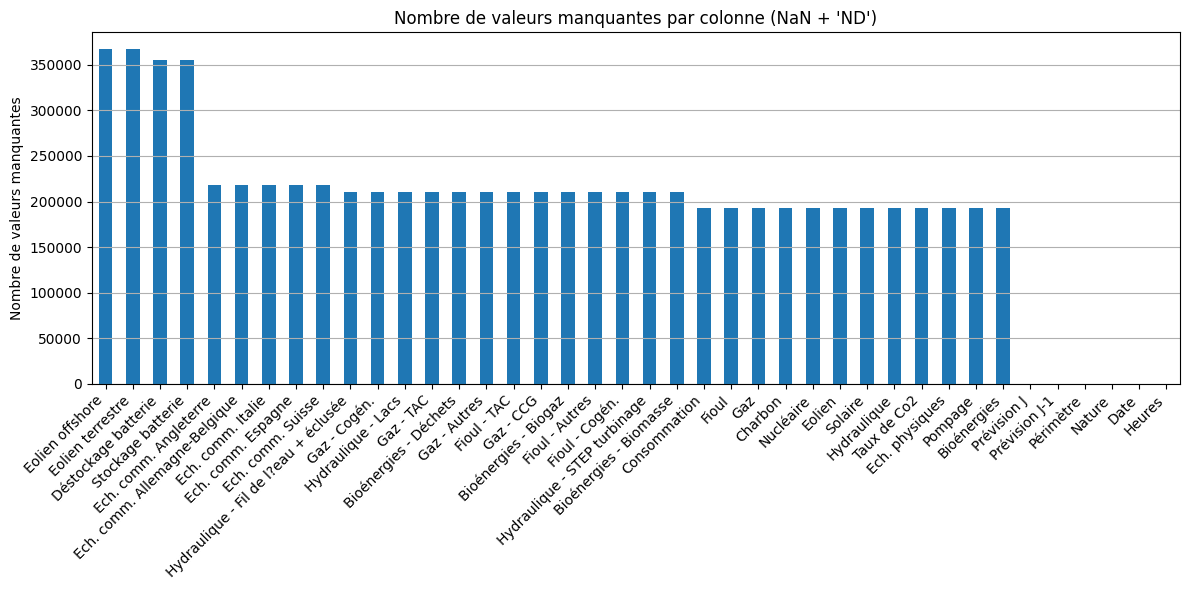

In [17]:


# Exemple de chargement du fichier

# Remplacer tous les 'ND' par NaN

# Compter les valeurs manquantes (NaN ou 'ND' convertis)
missing_counts = annuel.isna().sum()

# Visualisation en barplot
plt.figure(figsize=(12, 6))
missing_counts.sort_values(ascending=False).plot(kind='bar')
plt.title("Nombre de valeurs manquantes par colonne (NaN + 'ND')")
plt.ylabel("Nombre de valeurs manquantes")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [18]:
calendrier.columns

Index(['Date', 'Type de jour TEMPO'], dtype='object')

In [19]:
calendrier["Date"] 

0      2014-09-01
1      2014-09-02
2      2014-09-03
3      2014-09-04
4      2014-09-05
          ...    
3884   2025-04-20
3885   2025-04-21
3886   2025-04-22
3887   2025-04-23
3888   2025-04-24
Name: Date, Length: 3889, dtype: datetime64[ns]

In [20]:
annuel["Date"] 

0         2012-01-01
1         2012-01-01
2         2012-01-01
3         2012-01-01
4         2012-01-01
             ...    
464166    2025-04-27
464167    2025-04-27
464168    2025-04-27
464169    2025-04-27
464170    2025-04-27
Name: Date, Length: 464160, dtype: object

In [21]:
def fusionner_par_date(annuel: pd.DataFrame, calendrier: pd.DataFrame, type_jointure: str = "inner") -> pd.DataFrame:
    """
    Fusionne deux DataFrames sur la colonne 'Date' après conversion en datetime.

    Args:
        annuel (pd.DataFrame): DataFrame contenant les données principales.
        calendrier (pd.DataFrame): DataFrame contenant les infos de calendrier.
        type_jointure (str): Type de jointure ('inner', 'left', 'right', 'outer').

    Returns:
        pd.DataFrame: DataFrame fusionné sur la colonne 'Date'.
    """
    # Conversion en datetime
    annuel['Date'] = pd.to_datetime(annuel['Date'], errors='coerce')
    calendrier['Date'] = pd.to_datetime(calendrier['Date'], errors='coerce')

    # Suppression des lignes avec dates invalides (optionnel)
    annuel = annuel.dropna(subset=['Date'])
    calendrier = calendrier.dropna(subset=['Date'])

    # Fusion
    fusion = pd.merge(annuel, calendrier, on='Date', how=type_jointure)
    return fusion


In [22]:
df_final = fusionner_par_date(annuel, calendrier, type_jointure="inner")

C:\Users\user\AppData\Local\Temp\ipykernel_16768\1110762336.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annuel['Date'] = pd.to_datetime(annuel['Date'], errors='coerce')


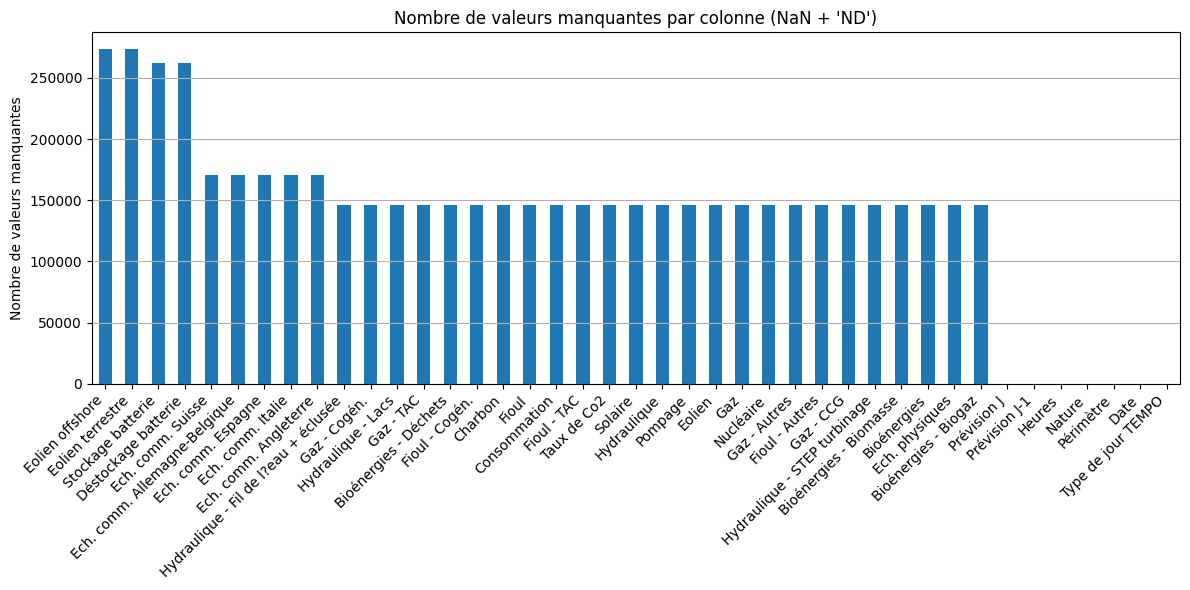

In [23]:




missing_counts = df_final.isna().sum()

# Visualisation en barplot
plt.figure(figsize=(12, 6))
missing_counts.sort_values(ascending=False).plot(kind='bar')
plt.title("Nombre de valeurs manquantes par colonne (NaN + 'ND')")
plt.ylabel("Nombre de valeurs manquantes")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [24]:
def garder_colonnes_utiles(df: pd.DataFrame) -> pd.DataFrame:
    """
    Garde uniquement les colonnes essentielles dans le DataFrame.

    Colonnes conservées :
        - 'Type de jour TEMPO'
        - 'Date'
        - 'Heures'
        - 'Prévision J'
        - 'Prévision J-1'
        - 'Consommation'

    Args:
        df (pd.DataFrame): Le DataFrame d'origine.

    Returns:
        pd.DataFrame: Le DataFrame filtré avec uniquement les colonnes souhaitées.
    """
    colonnes_a_garder = [
        'Type de jour TEMPO',
        'Date',
        'Heures',
        'Prévision J',
        'Prévision J-1',
        'Consommation'
    ]
    
    # On garde uniquement celles qui existent dans le DataFrame
    colonnes_presentes = [col for col in colonnes_a_garder if col in df.columns]
    
    return df[colonnes_presentes].copy()


In [25]:
df_v1 = garder_colonnes_utiles(df_final)

In [26]:
df_v1

,Type de jour TEMPO,Date,Heures,Prévision J,Prévision J-1,Consommation
0,BLEU,2014-09-01,00:00,42500.0,42600.0,43320.0
1,BLEU,2014-09-01,00:15,41400.0,41450.0,NaN
2,BLEU,2014-09-01,00:30,40300.0,40300.0,41174.0
3,BLEU,2014-09-01,00:45,39150.0,39050.0,NaN
4,BLEU,2014-09-01,01:00,38000.0,37800.0,38430.0
...,...,...,...,...,...,...
370363,BLEU,2025-04-24,22:45,48348.0,48450,48824.0
370364,BLEU,2025-04-24,23:00,48961.0,49000,48320.0
370365,BLEU,2025-04-24,23:15,48478.0,48700,48274.0
370366,BLEU,2025-04-24,23:30,47995.0,48400,47519.0


In [27]:
df_nan_conso = df_v1[df_v1['Consommation'].isna()][['Date', 'Heures','Consommation']]
df_nan_conso

,Date,Heures,Consommation
1,2014-09-01,00:15,NaN
3,2014-09-01,00:45,NaN
5,2014-09-01,01:15,NaN
7,2014-09-01,01:45,NaN
9,2014-09-01,02:15,NaN
...,...,...,...
292215,2022-12-31,21:45,NaN
292217,2022-12-31,22:15,NaN
292219,2022-12-31,22:45,NaN
292221,2022-12-31,23:15,NaN


In [28]:
df_nan_conso["Date"].unique()

<DatetimeArray>
['2014-09-01 00:00:00', '2014-09-02 00:00:00', '2014-09-03 00:00:00',
 '2014-09-04 00:00:00', '2014-09-05 00:00:00', '2014-09-06 00:00:00',
 '2014-09-07 00:00:00', '2014-09-08 00:00:00', '2014-09-09 00:00:00',
 '2014-09-10 00:00:00',
 ...
 '2022-12-22 00:00:00', '2022-12-23 00:00:00', '2022-12-24 00:00:00',
 '2022-12-25 00:00:00', '2022-12-26 00:00:00', '2022-12-27 00:00:00',
 '2022-12-28 00:00:00', '2022-12-29 00:00:00', '2022-12-30 00:00:00',
 '2022-12-31 00:00:00']
Length: 3044, dtype: datetime64[ns]

In [29]:
def verifier_pattern_nan_15min(df: pd.DataFrame):
    """
    Affiche un graphique clair du taux de NaN par quart d'heure dans 'Consommation'.
    """
    import matplotlib.pyplot as plt

    df['Heure'] = df['Heures'].astype(str)
    df['is_nan'] = df['Consommation'].isna().astype(int)

    # Calculer le % de NaN par heure
    stats = df.groupby('Heure')['is_nan'].mean().sort_index() * 100

    # Trier pour afficher par ordre horaire
    stats = stats.reindex(sorted(stats.index))

    # Affichage
    plt.figure(figsize=(14, 5))
    bars = plt.bar(stats.index, stats.values, color='orange')

    # Ajouter les % sur les barres si lisibles
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{height:.0f}%", ha='center', va='bottom', fontsize=8)

    plt.title("Taux de NaN dans 'Consommation' par quart d'heure")
    plt.ylabel("Pourcentage de NaN (%)")
    plt.xlabel("Heure")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.ylim(0, 110)
    plt.show()


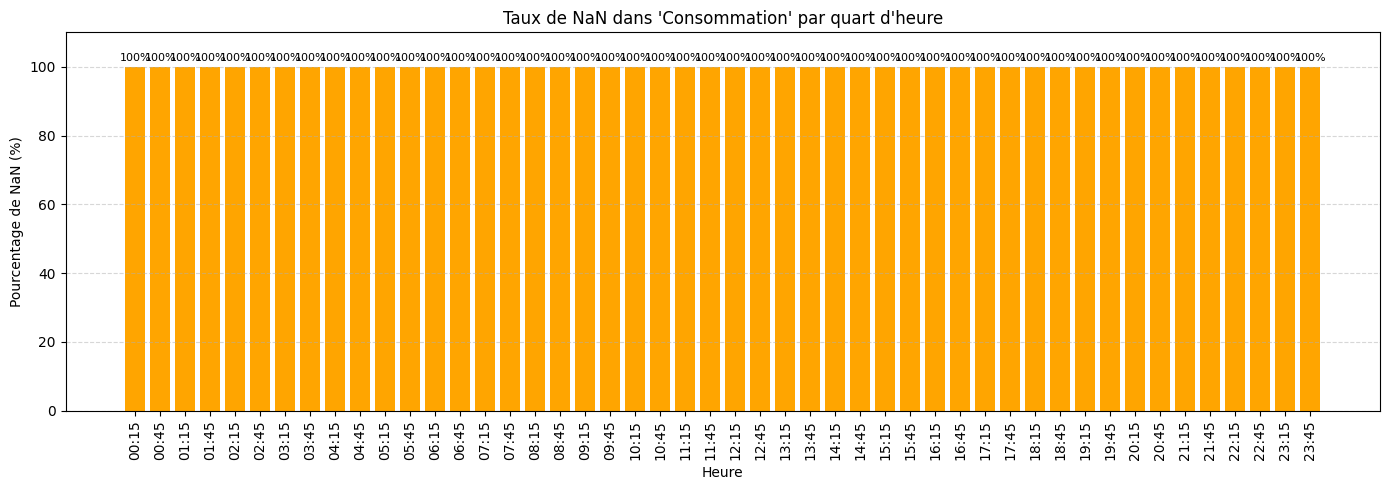

In [30]:
verifier_pattern_nan_15min(df_nan_conso)

In [31]:
def supprimer_nan_quart_impair(df: pd.DataFrame) -> pd.DataFrame:
    """
    Supprime les lignes où 'Heures' est à :15 ou :45 et 'Consommation' est NaN.

    Args:
        df (pd.DataFrame): Le DataFrame d'origine.

    Returns:
        pd.DataFrame: Le DataFrame nettoyé.
    """
    # Extraire les minutes comme entier (ex: 15, 30, 45, ...)
    df['Minutes'] = df['Heures'].astype(str).str.slice(3, 5).astype(int)

    # Identifier les lignes à supprimer : minutes = 15 ou 45 ET consommation = NaN
    condition_suppr = df['Minutes'].isin([15, 45]) & df['Consommation'].isna()

    # Supprimer ces lignes
    df_filtré = df[~condition_suppr].copy()

    # Nettoyage : on peut retirer la colonne temporaire si besoin
    df_filtré.drop(columns='Minutes', inplace=True)

    return df_filtré


In [32]:
df_filtre = supprimer_nan_quart_impair(df_v1)

In [33]:
def comparer_dataframes(df_original: pd.DataFrame, df_nettoye: pd.DataFrame):
    """
    Affiche un tableau comparatif des données avant et après nettoyage.
    """
    total_original = len(df_original)
    total_nettoye = len(df_nettoye)
    nan_original = df_original['Consommation'].isna().sum()
    nan_nettoye = df_nettoye['Consommation'].isna().sum()

    comparatif = pd.DataFrame({
        "Avant nettoyage (df_v1)": [total_original, nan_original, total_original - total_nettoye],
        "Après nettoyage (df_filtré)": [total_nettoye, nan_nettoye, None]
    }, index=["Nombre de lignes", "NaN dans 'Consommation'", "Lignes supprimées"])
    
    return comparatif


In [34]:
df_comparatif = comparer_dataframes(df_v1, df_filtre)

In [35]:
df_comparatif

,Avant nettoyage (df_v1),Après nettoyage (df_filtré)
Nombre de lignes,370368,224256.0
NaN dans 'Consommation',146112,0.0
Lignes supprimées,146112,NaN


In [36]:
df_filtre

,Type de jour TEMPO,Date,Heures,Prévision J,Prévision J-1,Consommation
0,BLEU,2014-09-01,00:00,42500.0,42600.0,43320.0
2,BLEU,2014-09-01,00:30,40300.0,40300.0,41174.0
4,BLEU,2014-09-01,01:00,38000.0,37800.0,38430.0
6,BLEU,2014-09-01,01:30,38300.0,37800.0,37800.0
8,BLEU,2014-09-01,02:00,37400.0,37400.0,37137.0
...,...,...,...,...,...,...
370363,BLEU,2025-04-24,22:45,48348.0,48450,48824.0
370364,BLEU,2025-04-24,23:00,48961.0,49000,48320.0
370365,BLEU,2025-04-24,23:15,48478.0,48700,48274.0
370366,BLEU,2025-04-24,23:30,47995.0,48400,47519.0


In [37]:
def ajouter_infos_temporelles(df: pd.DataFrame) -> pd.DataFrame:
    """
    Ajoute les colonnes 'Jour', 'Weekend' et 'Saison' à partir de la colonne 'Date'.
    """
    # Assurer que 'Date' est bien au format datetime
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

    # Jour de la semaine
    df['Jour'] = df['Date'].dt.day_name(locale='fr_FR') 

    # Weekend (Samedi = 5, Dimanche = 6)
    df['Weekend'] = df['Date'].dt.weekday.isin([5, 6]).astype(int)

    # Mois pour construire les saisons
    mois = df['Date'].dt.month

    # Fonction d'attribution des saisons
    def determiner_saison(m):
        if m in [12, 1, 2]:
            return 'Hiver'
        elif m in [3, 4, 5]:
            return 'Printemps'
        elif m in [6, 7, 8]:
            return 'Été'
        else:
            return 'Automne'

    df['Saison'] = mois.apply(determiner_saison)

    return df


In [38]:
df_filtre= ajouter_infos_temporelles(df_filtre)
df_filtre

,Type de jour TEMPO,Date,Heures,Prévision J,Prévision J-1,Consommation,Jour,Weekend,Saison
0,BLEU,2014-09-01,00:00,42500.0,42600.0,43320.0,Lundi,0,Automne
2,BLEU,2014-09-01,00:30,40300.0,40300.0,41174.0,Lundi,0,Automne
4,BLEU,2014-09-01,01:00,38000.0,37800.0,38430.0,Lundi,0,Automne
6,BLEU,2014-09-01,01:30,38300.0,37800.0,37800.0,Lundi,0,Automne
8,BLEU,2014-09-01,02:00,37400.0,37400.0,37137.0,Lundi,0,Automne
...,...,...,...,...,...,...,...,...,...
370363,BLEU,2025-04-24,22:45,48348.0,48450,48824.0,Jeudi,0,Printemps
370364,BLEU,2025-04-24,23:00,48961.0,49000,48320.0,Jeudi,0,Printemps
370365,BLEU,2025-04-24,23:15,48478.0,48700,48274.0,Jeudi,0,Printemps
370366,BLEU,2025-04-24,23:30,47995.0,48400,47519.0,Jeudi,0,Printemps


In [39]:
df_filtre.to_csv("../data/processed/df_filtre.csv", sep="\t", index=False, encoding="latin1")